In [1]:
'''

Quick tool to deal with METADISE GB scan results. The script takes a csv file as an input that is set out 
with displacements as the x and y grid and energies as the grid. 

Author : Adam Symington 
Date: 01/05/2018
'''


import matplotlib.pyplot as plt
import csv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np



def ReadGrid_V2(File):
    Data = np.genfromtxt(File, delimiter=',', dtype="float")
    
    X = Data[0]
    X = np.delete(X, 0)
    Y = (Data[:,0])
    Y = np.delete(Y, 0)

    Grid = np.array([])
    
    for i in range(1, (X.size + 1)):
        Temp = Data[:,i]
        Temp = np.delete(Temp, 0)
        Grid = np.append(Grid, Temp)
    
    Grid = np.reshape(Grid, (X.size, Y.size))
    return X, Y, Grid
    

def ReadGrid_V1(File):
    results = []
    with open(File) as csvfile:
        Data = csv.reader(csvfile, delimiter=',', quotechar=',')
        for row in Data:
            results.append(row)
    Data = np.asarray(results)

    X = np.array([])
    Y = np.array([])
    Grid = np.array([])

    for i in range(0, Data.size):
        if i == 0:
            X = np.append(X, Data[i])
        elif i != 0:
            temp = np.asarray(Data[i])
            Y = np.append(Y, temp[0])
            temp = np.delete(temp, 0)
            Grid = np.append(Grid, temp)

    X = np.insert(X, 0, 0)
    X = X.astype(float)
    Y = Y.astype(float)
    Grid = Grid.astype(float)
    Grid = np.reshape(Grid, (Y.size, X.size))
    
    return X, Y, Grid
    
    
def GridPlot(X, Y, Grid):
    Y, X = np.meshgrid(Y, X)
    plt.contourf(Y, X, Grid, 25, cmap='jet', interpolation='nearest')
    plt.xlabel("Displacement in X (" r'$\AA$' ")", fontsize=18)
    plt.ylabel("Displacement in Y (" r'$\AA$' ")", fontsize=18)
    plt.tick_params(labelsize=14)
    plt.tight_layout()
    plt.colorbar()
    plt.show()
    plt.close()


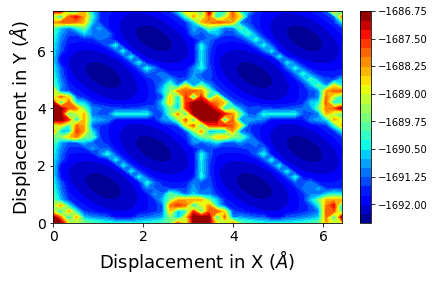

In [2]:
X, Y, Grid = ReadGrid_V2("111.csv")
GridPlot(X, Y, Grid)

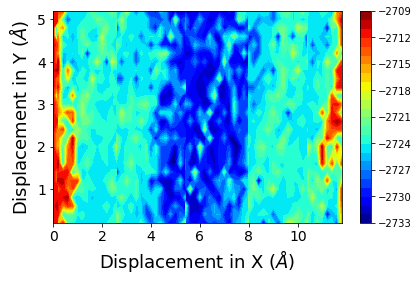

In [3]:
X, Y, Grid = ReadGrid_V2("210.csv")
GridPlot(X, Y, Grid)

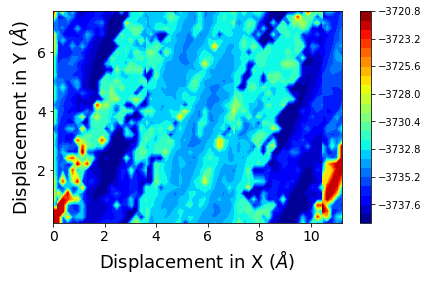

In [4]:
X, Y, Grid = ReadGrid_V2("221.csv")
GridPlot(X, Y, Grid)

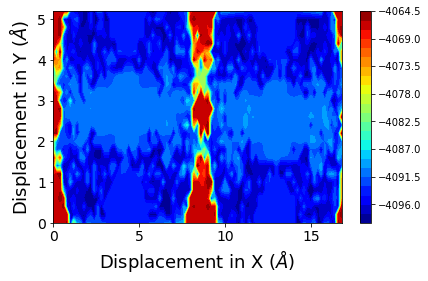

In [5]:
X, Y, Grid = ReadGrid_V2("310.csv")
GridPlot(X, Y, Grid)

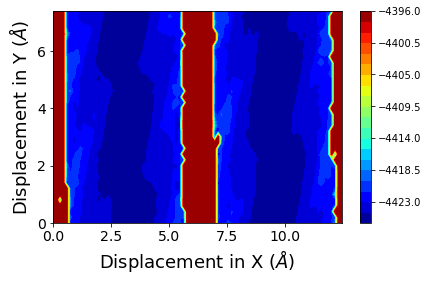

In [6]:
X, Y, Grid = ReadGrid_V2("311.csv")
GridPlot(X, Y, Grid)

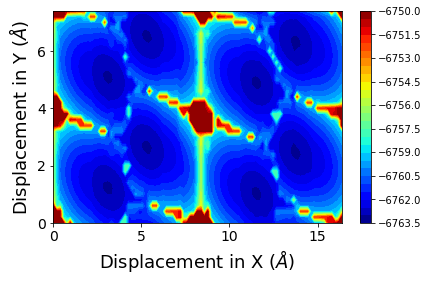

In [7]:
X, Y, Grid = ReadGrid_V2("331.csv")
GridPlot(X, Y, Grid)